<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/visulaiz_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pylab as plt
tf.compat.v1.disable_eager_execution()
import cv2

In [2]:
model=tf.keras.applications.VGG16(include_top =True
                                  ,weights= "imagenet")

553467096/553467096 [==============================] - 6s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
def preprocess(x):
  x-=x.mean()
  x/=(x.std())
  x=np.clip(x,0,1)

  return x



In [5]:
def pattern_model(layer_name,kernel_index,size=150):
  layer=model.get_layer(layer_name).output

  loss=K.mean(layer[:,:,:,kernel_index])
  grads=K.gradients(loss,model.input)[0]
  grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

  iterate=K.function([model.input],[loss,grads])

  rand_img=np.random.random((1,size,size,3))*30

  for i in range(40):
    losses,grads=iterate(rand_img)
    rand_img+=grads+.1

  img=rand_img[0]
  return preprocess(img)



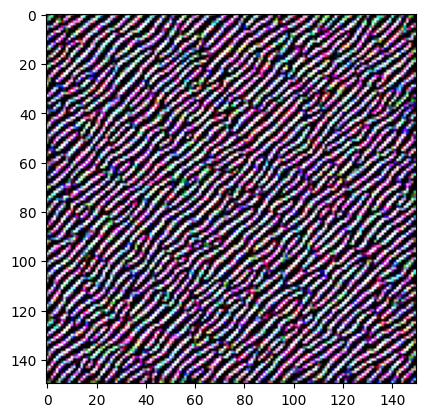

In [6]:
plt.imshow(pattern_model('block2_conv2',10))

In [7]:
lista=[]
for i in ['block1_conv2']:

  for j in range(10):
    print("kernal number"+str(j)+"is loaded ..")
    lista.append(pattern_model(i,j))




kernal number0is loaded ..
kernal number1is loaded ..
kernal number2is loaded ..
kernal number3is loaded ..
kernal number4is loaded ..
kernal number5is loaded ..
kernal number6is loaded ..
kernal number7is loaded ..
kernal number8is loaded ..
kernal number9is loaded ..


In [8]:
model=tf.keras.applications.VGG16(include_top= False, weights="imagenet", input_shape=(150,150,3))

58889256/58889256 [==============================] - 1s 0us/step


In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
activatd = [layer.output for layer in model.layers[:5] if not layer.name.startswith('input')]


In [11]:
activatd

[<tf.Tensor 'block1_conv1_1/Relu:0' shape=(None, 150, 150, 64) dtype=float32>,
 <tf.Tensor 'block1_conv2_1/Relu:0' shape=(None, 150, 150, 64) dtype=float32>,
 <tf.Tensor 'block1_pool_1/MaxPool:0' shape=(None, 75, 75, 64) dtype=float32>,
 <tf.Tensor 'block2_conv1_1/Relu:0' shape=(None, 75, 75, 128) dtype=float32>]

In [12]:
model=tf.keras.models.Model(inputs=model.input,outputs=activatd)

In [13]:
img=cv2.imread('/content/288588897_572803277575707_4393860805141508321_n.jpg')

In [14]:
np.array(img).shape

()

In [15]:
img=np.resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [16]:
img=np.expand_dims(img,axis=0)
img.shape

(1, 150, 150, 3)

In [17]:
outs=model.predict(img)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [18]:
len(outs)

4

In [32]:
layer=outs[1]

In [33]:
layer.shape

(1, 150, 150, 64)

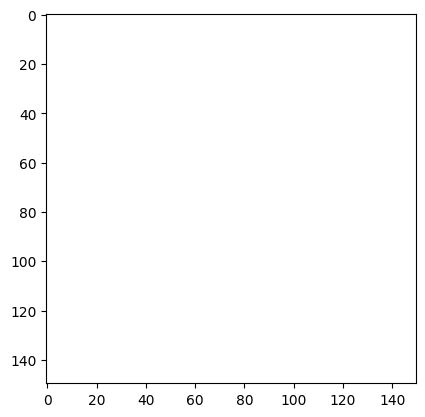

In [35]:
plt.imshow(layer[0,:,:,50])

In [36]:
model=tf.keras.applications.VGG16(weights="imagenet")

In [37]:
!wget https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg

--2023-09-09 20:26:57--  https://s3.amazonaws.com/book.keras.io/img/ch5/creative_commons_elephant.jpg
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.229.120, 52.217.73.206, 16.182.34.104, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.229.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190269 (186K) [image/jpeg]
Saving to: ‘creative_commons_elephant.jpg’

creative_commons_el 100%[===================>] 185.81K  --.-KB/s    in 0.08s   

2023-09-09 20:26:57 (2.33 MB/s) - ‘creative_commons_elephant.jpg’ saved [190269/190269]



In [44]:
img=cv2.imread("/content/creative_commons_elephant.jpg")
img=cv2.resize(img,(224,224))
img=np.expand_dims(img,axis=0)
img=tf.keras.applications.vgg16.preprocess_input(img)

In [45]:
img.shape

(1, 224, 224, 3)

In [50]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [46]:
preds=model.predict(img)

In [48]:
tf.keras.applications.vgg16.decode_predictions(preds)

35363/35363 [==============================] - 0s 0us/step


[[('n02504458', 'African_elephant', 0.57328516),
  ('n01871265', 'tusker', 0.3721029),
  ('n02504013', 'Indian_elephant', 0.045069713),
  ('n02408429', 'water_buffalo', 0.009402669),
  ('n02397096', 'warthog', 4.8759146e-05)]]

In [49]:
np.argmax(preds)

386

In [52]:
layer=model.get_layer('block5_conv3').output

In [55]:
model_out_put=model.output[:,386]

In [61]:
grads=K.gradients(model_out_put,layer)[0]

In [62]:
weighining=K.mean(grads,axis=(0,1,2))

In [63]:
iterrator=K.function([model.input],[weighining,layer[0]])

In [64]:
coff,layer=iterrator([img])

In [66]:
layer.shape

(14, 14, 512)

In [67]:
for i in range(512):
  layer[:,:,i]*=coff[i]


In [68]:
heatmap=np.mean(layer,axis=-1)

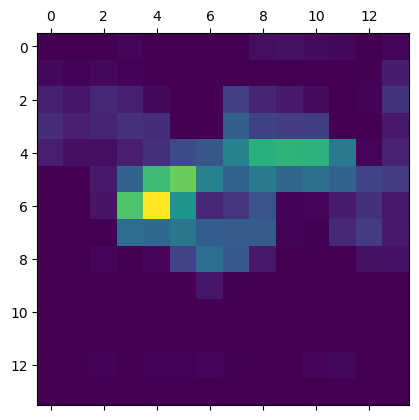

In [70]:
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

In [78]:
img=cv2.imread("/content/creative_commons_elephant.jpg")

In [79]:
heatmap=cv2.resize(heatmap, (img.shape[1], img.shape[0]))

In [80]:
heatmap=np.uint8(255*heatmap)
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)

In [81]:
heatmap.shape

(600, 899, 3)

In [82]:
merged=heatmap*.3+img

In [83]:
cv2.imwrite('elephant_cam.jpg', merged)

True

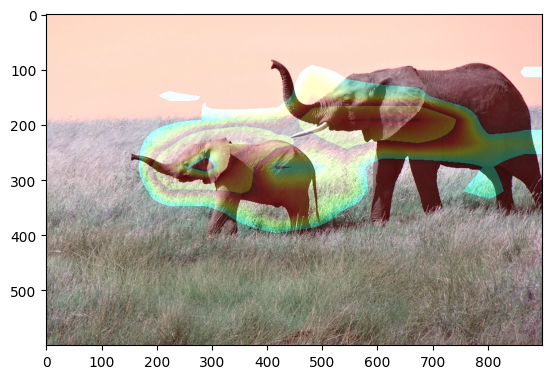

In [84]:
plt.imshow(cv2.imread('/content/elephant_cam.jpg'))